<h1>TEAM NAME: ADANSO

    
<h3>Team Members:<br><br>
1. Adarsh Anand <br>
2. Aniket Chaudhri <br>
3. Somesh Agrawal

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
df=pd.read_csv("ex1data2.txt", sep=",",header=None, names=['x1', 'x2','y'])
df["y"]=df["y"]/1000
df.head()

,x1,x2,y
0,2104,3,399.9
1,1600,3,329.9
2,2400,3,369.0
3,1416,2,232.0
4,3000,4,539.9


In [187]:
print(df.shape)

(47, 3)


Reference: Stanford lecture notes: https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf
            
1. Implement LMS algorithm for linear regression from scratch. Visualize the learnt house prices on the scatter plot of the input training dataset
2. On the full batch gradient descent visualize the contours of J(W) for different values of the learning rate η.
3. On the stochastic gradient descent visualize the contours of J(W) for different values of the learning rate and batch sizes η.
4. Implement locally weighted linear regression as described in Stanford lecture notes.

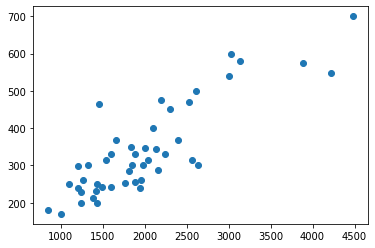

In [188]:
plt.scatter(df['x1'],df['y'])

In [189]:
X = df[['x1','x2']].values
Y = df['y'].values

In [344]:
def cost(X,y,theta):
    hx = X.dot(theta)
    loss = ((hx-y).T)@(hx-y)
    loss /= 2
    return loss

In [191]:
def normalize_data(df):

    numerical_cols = ['x1','x2']
    
    # Normalize using Z-score normalization
    df2[numerical_cols] = (df2[numerical_cols] - df2[numerical_cols].mean()) / df2[numerical_cols].std()
    
    return df2

In [192]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=100, tolerance=0.001):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
    
    def fit(self, X, y):
        # Add a column of ones for the bias term
        X = np.insert(X, 0, 1, axis=1)
        
        # Initialize the weights randomly
        np.random.seed(0)
        self.weights = np.random.randn(X.shape[1])
        
        # Perform gradient descent
        for i in range(self.max_iterations):
            # Compute the gradient
            gradient = np.dot(X.T, np.dot(X, self.weights) - y)
            
            # Update the weights
            self.weights -= self.learning_rate * gradient
            
            # Check convergence
            if np.linalg.norm(gradient) < self.tolerance:
                break
    
    def predict(self, X):
        # Add a column of ones for the bias term
        X = np.insert(X, 0, 1, axis=1)
        
        # Compute the predicted values
        y_pred = np.dot(X, self.weights)
        
        return y_pred

In [193]:
regression = LinearRegression()

In [207]:
df

,x1,x2,y
0,2104,3,399.900
1,1600,3,329.900
2,2400,3,369.000
3,1416,2,232.000
4,3000,4,539.900
5,1985,4,299.900
6,1534,3,314.900
7,1427,3,198.999
8,1380,3,212.000
9,1494,3,242.500


In [199]:
df1= normalize_data(df)
df1["y"]=df1["y"]/1000
X = df1[['x1','x2']].values
Y = df1['y'].values
regression.fit(X,Y)

In [200]:
regression.weights

array([340.41265957, 110.63102597,  -6.64944996])

In [201]:
y_pred= regression.predict(X)
y_pred

array([356.28310174, 286.12093745, 397.48945219, 269.24416623,
       472.27785108, 330.97904801, 276.93303499, 262.03749614,
       255.4945959 , 271.36460925, 324.71456906, 341.80519482,
       326.49202405, 669.2931949 , 239.90300384, 374.83040069,
       255.87994446, 235.44826325, 417.84648951, 476.59338103,
       309.36911491, 334.95158992, 286.67778003, 327.77720321,
       604.9133109 , 216.51561574, 266.35302609, 415.02999326,
       369.64732351, 430.48237468, 328.1302684 , 220.07052573,
       338.6356334 , 500.0876964 , 306.75639605, 263.42960258,
       235.86589518, 351.44301259, 641.41878285, 355.6193319 ,
       303.7684058 , 374.93732796, 411.99964248, 230.43668008,
       190.72936334, 312.46403243, 230.85431201])

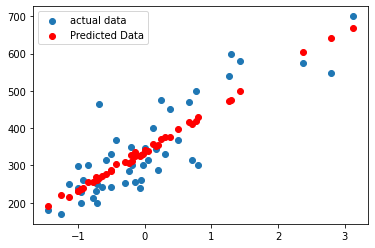

In [203]:
plt.scatter(X[:,0],Y,label = 'actual data')
plt.scatter(X[:,0],y_pred, color = 'r',label = 'Predicted Data')
plt.legend()
plt.show()

In [328]:
def bestWeight(X, y,weights,learning_rate):

    # Perform gradient descent
    weight_list  = np.array(weights)
    for i in range(50):
        # Compute the gradient
        gradient = np.dot(X.T, np.dot(X, weights) - y)
        # Update the weights

        weights -= learning_rate * gradient
        weight_list = np.append(weight_list,weights,axis = 0)
        # Check convergence
        if np.linalg.norm(gradient) < 0.01:
            break
    weight_list=weight_list.reshape(-1,2)
    return weight_list, weights

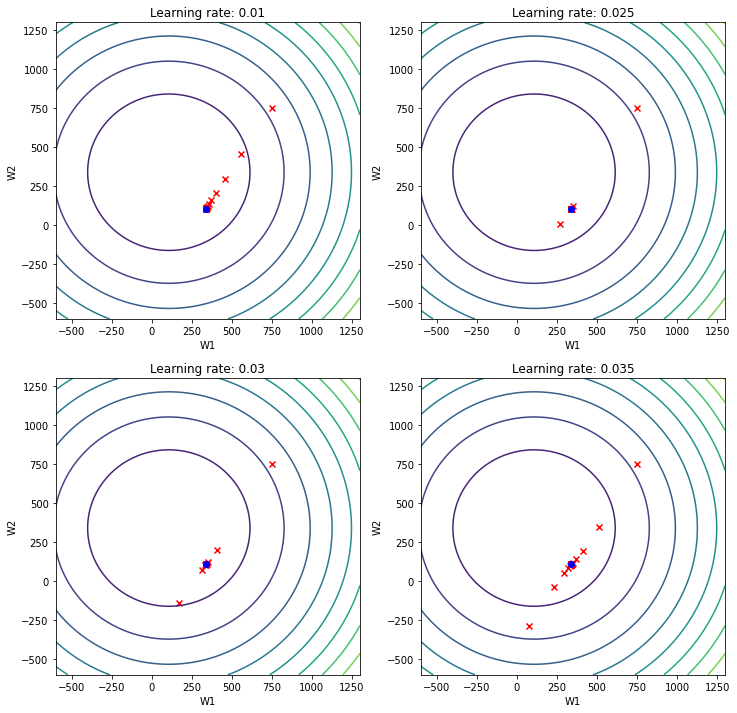

In [345]:
# Create a meshgrid of W1 and W2 values
W1_vals = np.linspace(-600, 1300, 400)
W2_vals = np.linspace(-600, 1300, 400)
W1, W2 = np.meshgrid(W1_vals, W2_vals)
W = np.array([W1, W2])

Xt= (df['x1'] - df['x1'].mean()) / df['x1'].std()
X1 = Xt.values.reshape(-1,1)
new_X = np.insert(X1, 0, 1, axis=1)

J_vals = np.zeros((W1_vals.size, W2_vals.size))
for t1, element in enumerate(W1_vals):
    for t2, element2 in enumerate(W2_vals):
        thetaT = np.ones(2)
        thetaT[0] = element
        thetaT[1] = element2
        J_vals[t1, t2] = cost(new_X, Y, thetaT)

# Set the learning rate values to be visualized
etas = [0.01, 0.025, 0.03, 0.035]

# Plot the contours of J(W) for each learning rate value
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# plt.contour(x1, y1, Z1,colors='red')
for i, eta in enumerate(etas):
    row = i // 2
    col = i % 2
    ax = axs[row][col]
    ax.set_title("Learning rate: {}".format(eta))
    ax.set_xlabel("W1")
    ax.set_ylabel("W2")

#     # Plot the contours of J(W)
    thetaT = np.ones(2)
    thetaT[0]= 750
    thetaT[1]= 750
    weight_list, weights = bestWeight(new_X,Y,thetaT,eta)
    ax.contour(W1, W2, J_vals, levels= 9)
    ax.scatter(weight_list[:,0], weight_list[:,1], color='r', marker='x')
    ax.scatter(weights[0], weights[1], color='b', marker='o')
plt.show()


In [358]:
def stochastic_gradient_descent(features, label,weights, learning_rate, batch_size):

    # Perform gradient descent
    length = len(features)
    weight_list  = np.array(weights)
    for i in range(50):
        # Compute the gradient
        arr = np.random.randint(0,length,batch_size)
        X = features[arr]
        Y = label[arr]
        gradient = np.dot(X.T, np.dot(X, weights) - Y)
        # Update the weights

        weights -= learning_rate * gradient
        weight_list = np.append(weight_list,weights,axis = 0)
        # Check convergence
        if np.linalg.norm(gradient) < 0.0001:
            break
    weight_list=weight_list.reshape(-1,2)
    return weight_list, weights

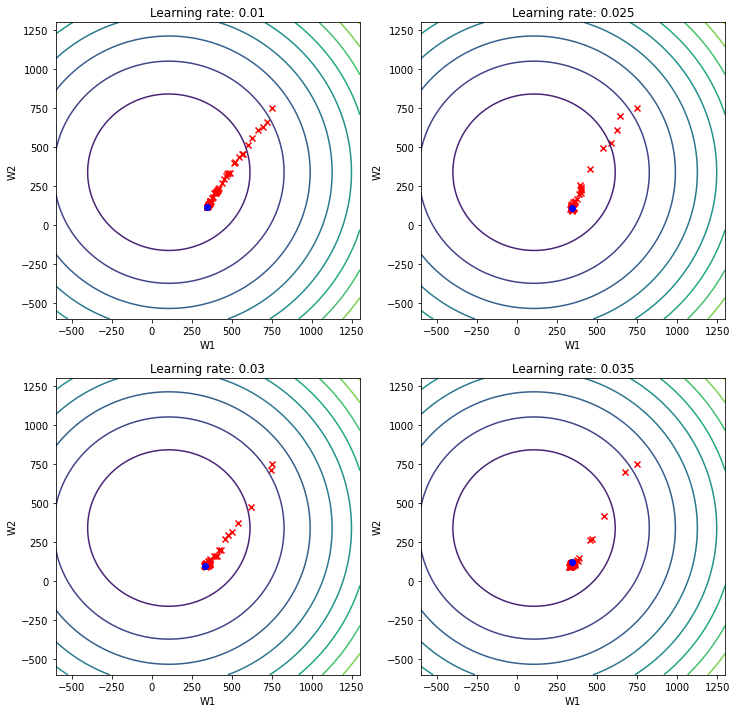

In [359]:
# Create a meshgrid of W1 and W2 values
W1_vals = np.linspace(-600, 1300, 400)
W2_vals = np.linspace(-600, 1300, 400)
W1, W2 = np.meshgrid(W1_vals, W2_vals)
W = np.array([W1, W2])

Xt= (df['x1'] - df['x1'].mean()) / df['x1'].std()
X1 = Xt.values.reshape(-1,1)
new_X = np.insert(X1, 0, 1, axis=1)

J_vals = np.zeros((W1_vals.size, W2_vals.size))
for t1, element in enumerate(W1_vals):
    for t2, element2 in enumerate(W2_vals):
        thetaT = np.ones(2)
        thetaT[0] = element
        thetaT[1] = element2
        J_vals[t1, t2] = cost(new_X, Y, thetaT)

# Set the learning rate values to be visualized
etas = [0.01, 0.025, 0.03, 0.035]

# Plot the contours of J(W) for each learning rate value
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# plt.contour(x1, y1, Z1,colors='red')
for i, eta in enumerate(etas):
    row = i // 2
    col = i % 2
    ax = axs[row][col]
    ax.set_title("Learning rate: {}".format(eta))
    ax.set_xlabel("W1")
    ax.set_ylabel("W2")

#     # Plot the contours of J(W)
    thetaT = np.ones(2)
    thetaT[0]= 750
    thetaT[1]= 750
    batchsize = 8
    weight_list, weights = stochastic_gradient_descent(new_X,Y,thetaT,eta,batchsize)
    ax.contour(W1, W2, J_vals, levels= 9)
    ax.scatter(weight_list[:,0], weight_list[:,1], color='r', marker='x')
    ax.scatter(weights[0], weights[1], color='b', marker='o')
plt.show()


<h2> Locally Weighted regression

In [399]:
def getWeightMatrix(query_point, training, Bandwidth):
    denominator = (-2 * Bandwidth * Bandwidth)
    M = len(training)
    W = np.mat(np.eye(len(training)))
  
  # calculating weights for query points
    for i in range(M):
        xi = training[i]
        W[i, i] = np.exp(np.dot((xi-query_point), (xi-query_point).T)/denominator)
    return W

In [409]:
def predict(training, Y, query_x, bandwidth):
  W = getWeightMatrix(query_x, training, bandwidth)
  Y=Y.reshape(-1,1)

  # calculating parameter theta
  theta = np.linalg.pinv(training.T@(W @ training))@(training.T@(W @ Y))
  
  # calculating predictions
  pred = np.dot(query_x, theta)
  return theta, pred

In [410]:
predict(new_X, Y, [1,2],0.1)

(matrix([[588.96355139],
         [ -6.33616601]]),
 matrix([[576.29121936]]))

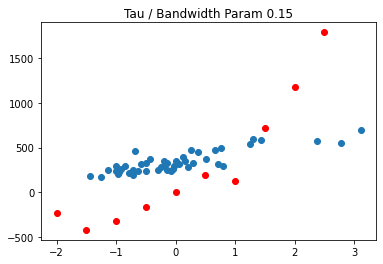

In [437]:
bandwidth = 0.15
X_test = np.linspace(-2, 2.5, 10)
Y_test = []
for query in X_test:
  theta, pred = predict(new_X, Y, query, bandwidth)
  Y_test.append(pred[0][0])

plt.title("Tau / Bandwidth Param %.2f"% bandwidth)
plt.scatter(X[:,0], Y)
Y_test = np.array(Y_test)
plt.scatter(X_test, Y_test, color ='red')
plt.show()

In [363]:
new_X

array([[ 1.00000000e+00,  1.30009869e-01],
       [ 1.00000000e+00, -5.04189838e-01],
       [ 1.00000000e+00,  5.02476364e-01],
       [ 1.00000000e+00, -7.35723065e-01],
       [ 1.00000000e+00,  1.25747602e+00],
       [ 1.00000000e+00, -1.97317285e-02],
       [ 1.00000000e+00, -5.87239800e-01],
       [ 1.00000000e+00, -7.21881404e-01],
       [ 1.00000000e+00, -7.81023044e-01],
       [ 1.00000000e+00, -6.37573110e-01],
       [ 1.00000000e+00, -7.63567023e-02],
       [ 1.00000000e+00, -8.56737193e-04],
       [ 1.00000000e+00, -1.39273340e-01],
       [ 1.00000000e+00,  3.11729182e+00],
       [ 1.00000000e+00, -9.21956312e-01],
       [ 1.00000000e+00,  3.76643089e-01],
       [ 1.00000000e+00, -8.56523009e-01],
       [ 1.00000000e+00, -9.62222960e-01],
       [ 1.00000000e+00,  7.65467909e-01],
       [ 1.00000000e+00,  1.29648433e+00],
       [ 1.00000000e+00, -2.94048269e-01],
       [ 1.00000000e+00, -1.41790005e-01],
       [ 1.00000000e+00, -4.99156507e-01],
       [ 1.